In [9]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import precision_score
import torchmetrics

import seaborn as sn
import pandas as pd

from IPython import embed

import os
import pickle

from tabulate import tabulate

%matplotlib inline

In [10]:
def class_matrix(cf, x):
    
    column_sums = np.sum(cf, axis=0)
    row_sums = np.sum(cf, axis=1)
    total_vals = np.sum(row_sums)

    TP = cf[x,x]
    FP = np.sum(cf[x]) - TP
    FN = column_sums[x] - TP
    TN = total_vals - row_sums[x] - column_sums[x] + TP
    
    return np.asarray([[TP, FP], [FN, TN]])

def plot_cfmat(cf_matrix, num_classes, title):
    
    df_cm = pd.DataFrame(cf_matrix, index = [i for i in range(num_classes)], columns = [i for i in range(num_classes)])
    
    plt.figure(figsize=(12,7))
    plt.title(title, fontsize=20)
    sn.heatmap(df_cm, annot = True, annot_kws={"fontsize":16}, fmt = ".0f", cmap ="Blues")
    
def agg_matrix_fn(all_matrices):
    
    total = np.zeros(all_matrices[0].shape)
    for i, matrix in enumerate(all_matrices):
        total = total + matrix
    
    return (total / (i + 1)).astype(int)

def plot_metric(data, metric, title):
    
    num_epochs = len(data)
    epochs = list(range(num_epochs))
    
    #plt.style.use("seaborn")
    fig, ax = plt.subplots(figsize = (8, 5))

    plt.plot(epochs, data, "-o", label = "label")
    
    plt.xlabel("Epochs", fontsize = 16)
    plt.title(title, fontsize=16)
    plt.ylabel(metric, fontsize = 16)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    #plt.ylim([0, 1.05])

    #ax.legend(bbox_to_anchor=(2, 1), loc="upper left", borderaxespad=0, fontsize=16)
        
    fig.tight_layout()
    
accuracy = torchmetrics.Accuracy('multiclass', num_classes=10)
precision = torchmetrics.Precision('multiclass', num_classes=10, average='macro')
recall = torchmetrics.Recall('multiclass', num_classes=10, average='macro')
f1_score = torchmetrics.F1Score('multiclass', num_classes=10, average='macro')

In [55]:
which_network = "CNN"
which_dataset = "mnist"

path = f"/Users/andyvarner/Documents/NN_Spring2023/project_1/results/{which_network}/{which_dataset}"
filename = os.path.join(path,"3_kernels_2_layers.pkl")
results = pickle.load(open(filename,"rb"))

results.keys()

dict_keys(['loss', 'validation'])

In [56]:
loss = results["loss"]
valid = results["validation"]

valid.keys()

preds = torch.Tensor(valid["preds"])
labels = torch.Tensor(valid["labels"])

In [57]:
# Compute the metrics
accuracy_val = accuracy(preds, labels)
precision_val = precision(preds, labels)
recall_val = recall(preds, labels)
f1_score_val = f1_score(preds, labels)

# Print the results
headers = ['Metric', 'Score']
data = [
    ["Accuracy", accuracy_val],
    ["Precision", precision_val],
    ["Recall", recall_val],
    ["F1 score", f1_score_val]
]

print(tabulate(data, headers = headers, tablefmt="simple"))

Metric        Score
---------  --------
Accuracy   0.999052
Precision  0.199795
Recall     0.199824
F1 score   0.199809


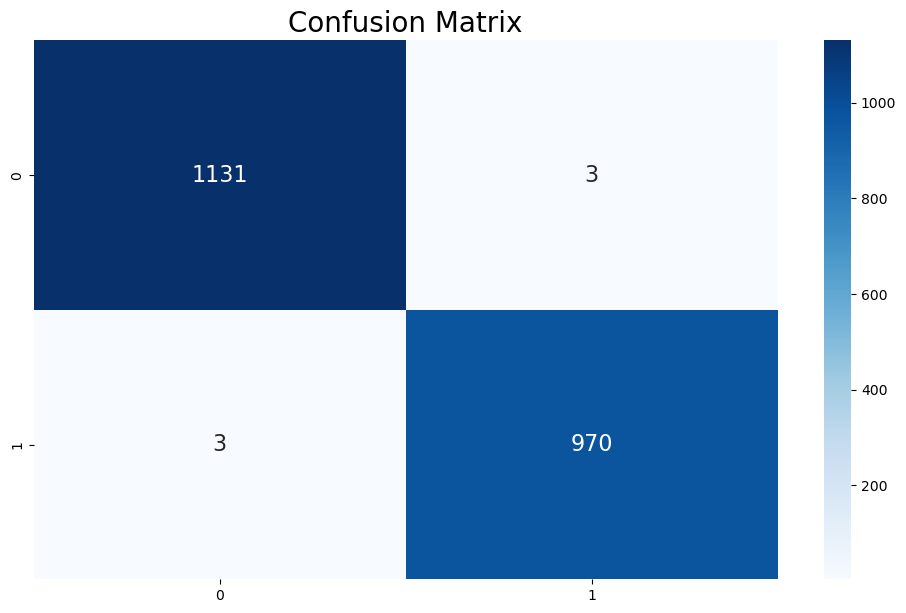

In [58]:
agg_matrix = agg_matrix_fn(valid["mats"])
plot_cfmat(agg_matrix,agg_matrix.shape[0], "Confusion Matrix")

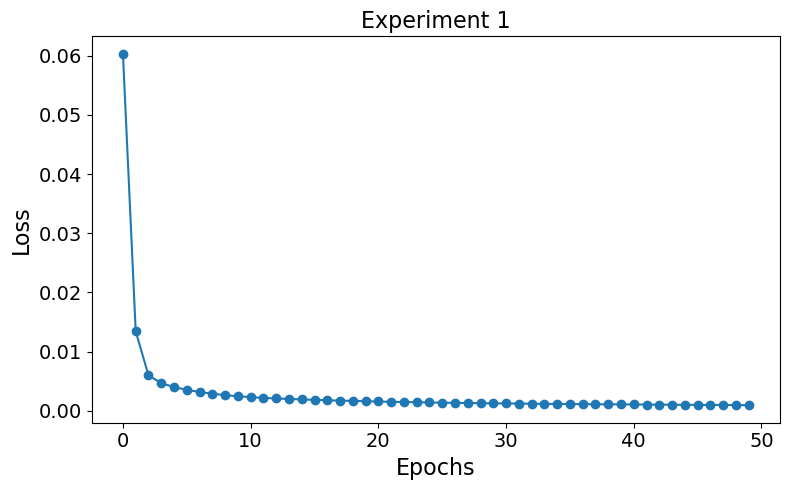

In [59]:
# plot loss across experiment
plot_metric(loss, "Loss", "Experiment 1")

In [60]:
# # plot a confusion matrix for a single epoch
# matrix = valid['mats'][0]
# plot_cfmat(matrix, 10, "A single epoch")


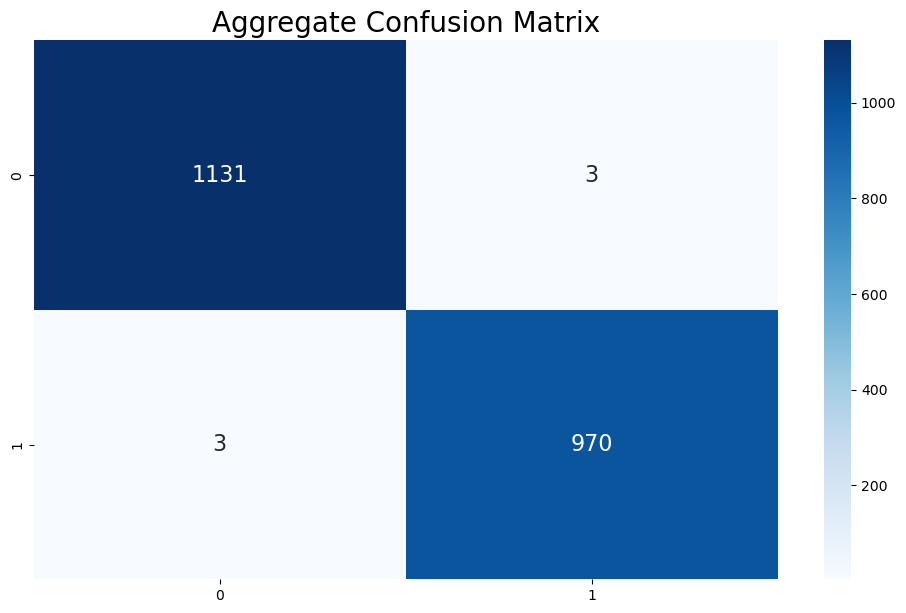

In [61]:
# aggregate confusion matrices across entire experiment

agg_matrix = agg_matrix_fn(valid["mats"])
plot_cfmat(agg_matrix,agg_matrix.shape[0], "Aggregate Confusion Matrix")